#EN2550: Assignment 03 on Object Counting on a Conveyor Belt

##Connected Component Analysis

In this part, we will generate an indexed image representing connected components in conveyor_f101.png image. Notice that, as there are three square nuts and one hexagonal nut in the image, there will be five connected components (backgound will be assigned the label 0).

1. Open the hexnut_template.png, squarenut_template.png and conveyor_f100.png and display. This is done for you.

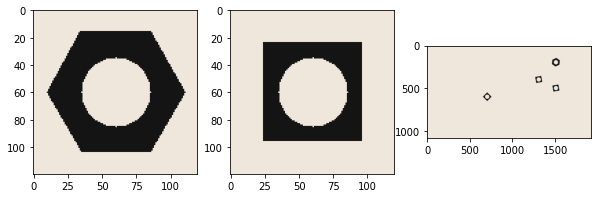

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

hexnut_template = cv.imread(r'Files/hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread(r'Files/squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread(r'Files/conveyor_f100.png', cv.IMREAD_COLOR)

fig, ax = plt. subplots(1,3,figsize=(10,10))
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
plt.show()

1. Convert the images to grayscale and apply Otsu's thresholding to obtain the binarized image. Do this for both the templates and belt images. See https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html for a guide. State the threshold value (automatically) selected in the operation. Display the output images.

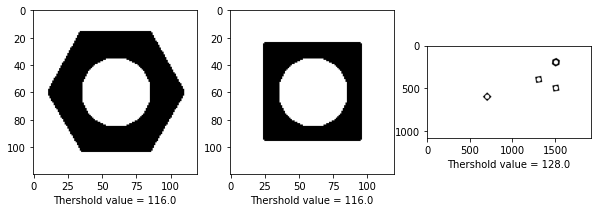

In [8]:
image_lst=[hexnut_template,squarenut_template,conveyor_f100]
thershold_lst=[0,0,0]
hexnut_template = cv.imread(r'Files/hexnut_template.png', cv.IMREAD_GRAYSCALE)
squarenut_template =  cv.imread(r'Files/squarenut_template.png', cv.IMREAD_GRAYSCALE)
conveyor_f100 =  cv.imread(r'Files/conveyor_f100.png', cv.IMREAD_GRAYSCALE)

for i in range(len(image_lst)):
    blur=cv.GaussianBlur(image_lst[i],(5,5),0)
    thershold_lst[i],image_lst[i] = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
fig, ax = plt. subplots(1,3,figsize=(10,10))
for i in range(len(image_lst)):
    ax[i].imshow(cv.cvtColor(image_lst[i], cv.COLOR_GRAY2BGR ))
    ax[i].set_xlabel("Thershold value = "+str(thershold_lst[i]))

Carry out morphological closing to remove small holes inside the foreground. Use a 3 × 3kernel.
 See https://docs.opencv.org/master/d9/d61/tutorial_py_morphological_ops.html for a guide.

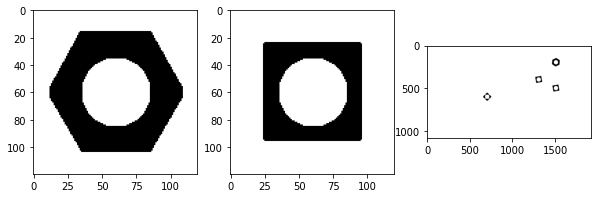

In [11]:
closing_image_lst=image_lst
kernel = np.ones((5,5),np.uint8)
fig, ax = plt. subplots(1,3,figsize=(10,10))
for i in range(len(image_lst)):
    closing_image_lst[i]=cv.morphologyEx(image_lst[i], cv.MORPH_CLOSE, kernel)
    ax[i].imshow(cv.cvtColor(closing_image_lst[i], cv.COLOR_GRAY2BGR ))

Connected components analysis: apply the connectedComponentsWithStats function (see https://docs.opencv.org/4.5.5/d3/dc0/group__imgproc__shape.html#ga107a78bf7cd25dec05fb4dfc5c9e765f) and display the outputs as colormapped images. Answer the following questions

How many connected components are detected in each image?

What are the statistics? Interpret these statistics.

What are the centroids?

For the hexnut template, you should get the object area in pixel as approximately 4728.